<a href="https://colab.research.google.com/github/vitroid/PythonTutorials/blob/master/8OtherClasses/BlackBodyRadiation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

平熱と発熱で、どれぐらい赤外線の放射量が変化するのかを考えます。

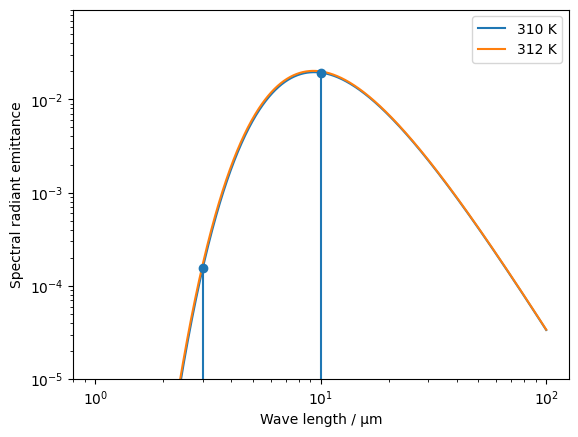

In [1]:
import numpy as np
import matplotlib.pyplot as plt

h=6.626e-34
c=2.998e8
k=1.381e-23

# 横軸=波長。対数目盛で等間隔になるように1〜100(μm)で1000点
L = np.logspace(0, 2, 1000)

def BlackBodyRadiation(L, T):
    """
    Eq. 4.25 in Widom's textbook
    """
    E = h*c/(np.exp(h*c/(L*1e-6*k*T))-1) / (L*1e-6)**5
    return E

E310 = BlackBodyRadiation(L, 310)
E312 = BlackBodyRadiation(L, 312)

fig = plt.figure()
# curves
plt.loglog(L, E310, label="310 K")
plt.loglog(L, E312, label="312 K")
# vertical bars
plt.stem(3.0, BlackBodyRadiation(3, 310))
plt.stem(10.0, BlackBodyRadiation(10, 310))

plt.ylim(1e-5, None)

plt.xlabel("Wave length / μm")
plt.ylabel("Spectral radiant emittance")
plt.legend()

fig.savefig("blackbody.pdf")

## 波長3μmの輻射の比。

In [2]:
BlackBodyRadiation(3, 310) / BlackBodyRadiation(3,312)

0.905609088954732

## 波長10μmの輻射の比。

In [3]:
BlackBodyRadiation(10, 310) / BlackBodyRadiation(10, 312)

0.9704079912714483

## 3 μmと10 μmでの輻射の比率を、310 Kと312 Kで比べる。



In [4]:
# 310 K, normal
ratio310 = BlackBodyRadiation(10, 310) / BlackBodyRadiation(3, 310)
ratio310

123.56261992197052

In [5]:
# 312 K, fever
ratio312 = BlackBodyRadiation(10, 312) / BlackBodyRadiation(3, 312)
ratio312

115.31173760201895

## 体温の範囲と輻射比



1.2087290349688886


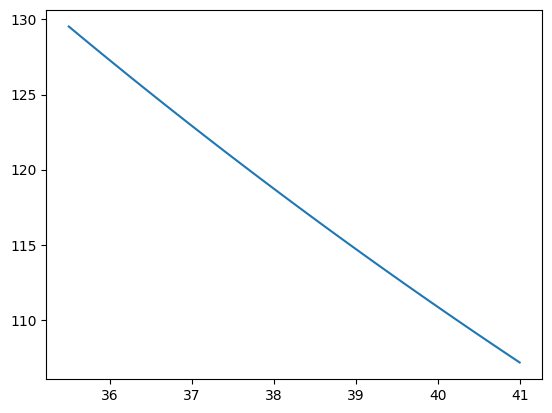

In [6]:
T = np.linspace(35.5, 41.0, 100)
ratio = BlackBodyRadiation(10, T+273.15) / BlackBodyRadiation(3, T+273.15)

plt.plot(T, ratio)
print(ratio[0] / ratio[-1])

平熱(低体温)〜高熱の範囲で、輻射比は2割ほど減る。減り方は直線的なので、輻射比から簡単に体温を算出できる。

実際に赤外線センサーを手に入れて、この通りになるのか試してみたいですね。

## Newton-Raphson法による極大振動数の求解

解きたい式は
$$\exp s={3\over 3-s}$$
すこし変形して、
$$f(s)=3\exp(-s)+s-3=0$$
$s$で微分すると、
$$f'(s) =-3e^{-s}+1$$
Newton-Raphson法による反復式は
$$s_{i+1}=s_i-{f(s_i)\over f'(s_i)}=s_i-{3e^{-s_i}+s_i-3\over-3e^{-s_i}+1}$$

In [ ]:
from math import exp
def iteration(s):
    return s - (3*exp(-s)+s-3)/(-3*exp(-s)+1)

s = 3
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)


## 極大波長の求解



In [ ]:
from math import exp
def iteration(s):
    return s - (5*exp(-s)+s-5)/(-5*exp(-s)+1)

s = 5
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)
s = iteration(s)
print(s)


In [ ]:
# 検算
exp(s)-(5/(5-s))

記号演算ライブラリsympyを使えば、何も考えずに数値解が得られる。

In [ ]:
# sympyを使った求解
from sympy import exp, nsolve
from sympy.abc import *

# 最後の5は数値求解の初期値。
nsolve(5*exp(-s)+s-5, s, 5)

## サーモグラフィーっぽい画像をつくる。

熱を測れないカメラでも、色をそれっぽくするとサーモグラフィーっぽくできるはず。

元画像をもってくる。

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/2018_Shibuya_Crossing.jpg/640px-2018_Shibuya_Crossing.jpg

そのまま表示。

In [ ]:
from IPython.display import Image, display
display(Image('640px-2018_Shibuya_Crossing.jpg'))


OpenCV (画像処理ライブラリ)をつかって、白黒にする。

In [ ]:
import sys
import cv2
import numpy as np

img_bgr = cv2.imread("640px-2018_Shibuya_Crossing.jpg")
# グレーに
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
# 最大最小でスケールしてコントラストを最大化
img = np.zeros_like(img_bgr)
img = cv2.normalize(img_gray,  img, 0, 255, cv2.NORM_MINMAX)

matplotlibをつかってそのまま表示。

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img)

サーモグラフィーっぽいカラーパレットをさがす。

https://matplotlib.org/stable/tutorials/colors/colormaps.html



In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img, cmap=plt.get_cmap('jet'))

フェイクサーモグラフィー画像のできあがり。

## 黒体放射の比熱

単純な式構成では積分できなかった。

In [ ]:
import sympy
from sympy.abc import *

T = sympy.Symbol("T", positive=True)
nu = sympy.Symbol("nu", positive=True)
# s = h*nu/(k*T)

x = sympy.exp(-h*nu/k/T)
G = 8*sympy.pi*nu**2*V/c**3
e = x*h*nu/(1-x)
E = (G*e).subs(nu, s*k*T/h)
E

8*pi*T**3*V*k**3*s**3*exp(-s)/(c**3*h**2*(1 - exp(-s)))

すべての振動数の放射を積分して全放射エネルギーを計算する。

In [ ]:
intE = sympy.integrate(E, (s, 0, sympy.oo))*k*T/h
intE

8*pi*T**4*V*k**4*Integral(s**3/(exp(s) - 1), (s, 0, oo))/(c**3*h**3)

積分の部分を定数とみなせば、放射エネルギーは温度の4乗に比例することがわかる。(Stefan-Boltzmannの法則)

黒体輻射の比熱は、これを温度で微分するので、温度の3乗で増えつづける。固体のDulong-Petitの法則のようにある値で飽和しないのは、上限振動数が存在しないから。